XSRZE0E_1IXT937Q2BJ2E850ID
4Z8WOPJ8D9TQVGGEA4CA_6SCW3
BRA7U7UXY4TE1MR0AN5Q3TQDA_
LMNG0BKXXE1GYFGDA6D*AS5D5E
3RT4AHSKP384YAGDAND*AUZCI8
6RHMG1CB_HTEYFGDA6D*AS5343
94PGE_G7WXTDYFGDA6D*BQ_8*F
7VC6V_G9RKTZNFGDAND*R81U3I
NRQEE_SKY41GYFGDAND*AUZCI8
B5QGE_G9RKTZNFGDAAD*AF5KIL
B5QGE_G9RKTZNFGDAAD*AF5KIL
BRT4AHSKFENA2NGDA6D*WX48Z3
B5QGE_G9RKTZNFGDA6D*R81P6N
B5QGE_SKMKTNLMRYAND*I8DI6Z
NV6GE_SK0EXTT62DA6D*51ZDJ3
5RTGE2SKMZUT2NGDAND*R81U3D
BRTGE2SKMG4M5NRDAND*AX48Z3
DRTGE2SKMENAI0GPAND*WX58Z3
9NAGE2SK1HXT9FG9AND*5X48Z3
3RT4E_SSFENT2NG9AND*5X48Z3
3RQGE_SKFEXTYXGDA6D*51P8Z3
3RQGE_SKFEXTY*GFSND*I858Z3
9RAGE_SKFEXTY*GFSND*I858Z3
9RAGE_SKFEXTY*GFSND*I858Z3
BRTGE2SKMXTTGNJ0AND*M858Z3
BRTGE2SKRCNN2NGDAND*WZ586N
ZR_GE_2KMKT1IFG9AND*M858Z3
BRQGE_SKFEXTY*GFSND*M84U6D
BRTGE2SKMXT1IMR0AND*M858Z3
B5TGE_SKY4TT1GGDAND*M8D86N
BRTGE_2KMKT1IFG9AND*MF58Z3
BRAGE_2KMKT1IFGDAND*IF58Z3
BRT4U_SK8EXTNFGLAND*A85861
3RAGE_S8RKTDYNGDAND*I858J3
NNAGEHSKRKTT2FGDAND*A85861
B5QGE_SKY4TTYNXLAND*M8D763
B5QGE_SKY4TTYNXLAND*I8D863
K

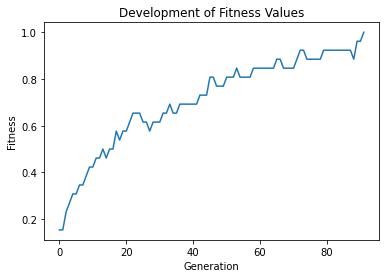

Number of generations: 92


In [15]:
import matplotlib.pyplot as plt

# Parameters
target_string = "BRAGE_SKRETTINGLAND*585863"
population_size = 500
mutation_rate = 0.005
crossover_rate = 0.9
max_generations = 1000
fitness_history = []
# Function to generate random string
def generate_random_string(length):
    return ''.join(random.choice(string.ascii_uppercase + string.digits + '_*') for _ in range(length))

# Function to generate initial population
def generate_initial_population(population_size, target_string_length):
    return [generate_random_string(target_string_length) for _ in range(population_size)]

# Function to calculate fitness of an individual
def calculate_fitness(individual):
    score = sum(1 for c1, c2 in zip(individual, target_string) if c1 == c2)
    return score / len(target_string)

# Function for selection based on roulette wheel selection
def select_parents(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_parents = random.choices(population, weights=probabilities, k=2)
    return selected_parents

# Function for single-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1))
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Function for mutation
def mutate(individual, mutation_rate):
    mutated_individual = ''
    for char in individual:
        if random.random() < mutation_rate:
            mutated_individual += random.choice(string.ascii_uppercase + string.digits + '_*')
        else:
            mutated_individual += char
    return mutated_individual

# Main function for Genetic Algorithm
def genetic_algorithm():
    population = generate_initial_population(population_size, len(target_string))

    for generation in range(max_generations):
        # Calculate fitness for each individual
        fitness_values = [calculate_fitness(individual) for individual in population]
        fitness_history.append(max(fitness_values))
        # Check for best fit solution
        best_fit_index = fitness_values.index(max(fitness_values))
        print(population[best_fit_index]) #print the best of each genereation
        if fitness_values[best_fit_index] == 1:
            print("Best fit solution found:", population[best_fit_index])
            break

        # Selection, Crossover, and Mutation
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_values)
            child1, child2 = parent1, parent2  # Default: no crossover
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        # Replacement
        population = new_population

    else:
        print("Maximum generations reached. Best fit solution not found.", population[best_fit_index])

        
    plt.plot(fitness_history)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Development of Fitness Values')
    plt.show()
    print("Number of generations:",len(fitness_history))
if __name__ == "__main__":
    genetic_algorithm()

